In [1]:
%matplotlib widget

import sys
sys.path.append('src/')

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 
from matplotlib import cm
from matplotlib.patches import Circle

## This notebook demonstrates some aspects of Circular Restricted Planar 3-body Problem (CRP3BP)

#### Jacobi integral

In [2]:
def Jacobi_integral(x, y, z, vx, vy, vz, mu1, mu2, n):
    r1 = np.sqrt((x + mu2) ** 2 + y*y + z*z)
    r2 = np.sqrt((x - mu1) ** 2 + y*y + z*z)
    return n * n * (x * x + y * y) + 2 * (mu1 / r1 + mu2 / r2) - vx * vx - vy * vy - vz * vz

#### Plot zero-velocity curve

In [89]:
def plot_zero_velocity_curve(CJ):
    npts   = 100
    x_grid = np.linspace(-2,2,npts)
    y_grid = np.linspace(-2,2,npts)
    x_grid, y_grid = np.meshgrid(x_grid,y_grid)
    
    r1      = np.sqrt((x_grid + mu2) ** 2 + y_grid * y_grid)
    r2      = np.sqrt((x_grid - mu1) ** 2 + y_grid * y_grid)
    
    preudo_potential = 0.5 * n * n * (x_grid * x_grid + y_grid * y_grid) + (mu1 / r1 + mu2 / r2)

    allowed = 2 * preudo_potential > CJ;

    x_grid_unallowed = x_grid.copy()
    y_grid_unallowed = y_grid.copy()

    x_grid_unallowed[allowed] = np.nan
    y_grid_unallowed[allowed] = np.nan

    x_grid_unallowed = x_grid_unallowed.flatten();
    y_grid_unallowed = y_grid_unallowed.flatten();

    x_grid_unallowed = x_grid_unallowed[~np.isnan(x_grid_unallowed)]
    y_grid_unallowed = y_grid_unallowed[~np.isnan(y_grid_unallowed)]
    
    plt.plot(x_grid_unallowed,  y_grid_unallowed,'.',color='k',markersize=1,alpha=0.1)
    plt.contour(x_grid, y_grid, 2 * preudo_potential, levels = [CJ], colors='r')

#### Pseudo-potential and its components

In [4]:
def centrifugal_potential(x, y, mu1, mu2, n):
    return n * n * (x * x + y * y)

def gravitational_potential(x, y, mu1, mu2):
    r1 = np.sqrt((x + mu2) ** 2 + y * y)
    r2 = np.sqrt((x - mu1) ** 2 + y * y)
    return  mu1 / r1 + mu2 / r2

def pseudo_potential(x, y, mu1, mu2, n):
    r1 = np.sqrt((x + mu2) ** 2 + y * y)
    r2 = np.sqrt((x - mu1) ** 2 + y * y)
    return n * n * (x * x + y * y) + mu1 / r1 + mu2 / r2

#### converting to inertial frame

In [5]:
def rotating2inertial(x, y, n, t):
    x_inertial = np.cos(n * t) * x - np.sin(n * t) * y
    y_inertial = np.sin(n * t) * x + np.cos(n * t) * y
    return x_inertial, y_inertial

#### Define body masses and rotation frequency

In [6]:
# reduced masses
mu1 = 0.8
mu2 = 0.2

# rotation frequency
n   = 1.0

In [ ]:
## Let's plot components of pseudo-potential

In [7]:
npts           = 400
x_grid         = np.linspace(-2,2,npts)
y_grid         = np.linspace(-2,2,npts)
x_grid, y_grid = np.meshgrid(x_grid,y_grid)

U_rot  = centrifugal_potential(x_grid, y_grid, mu1, mu2, n)
U_grav = gravitational_potential(x_grid, y_grid, mu1, mu2)
U      = U_rot + U_grav

U_min = np.min(U)
U_max = pseudo_potential(0, 2, mu1, mu2, n)

Text(0, 0.5, 'y')

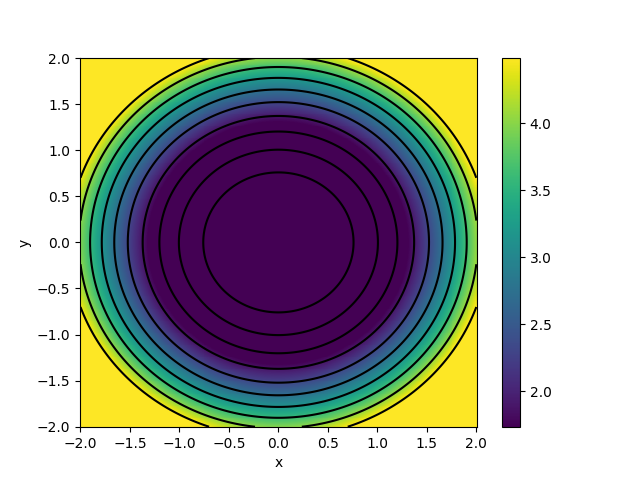

In [8]:
plt.figure()
plt.pcolor(x_grid, y_grid, U_rot)
plt.colorbar()
plt.clim((U_min,U_max))
levels = np.linspace(U_min/3, U_max, 10)
plt.contour(x_grid, y_grid, U_rot, levels = levels, colors='k')
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'y')

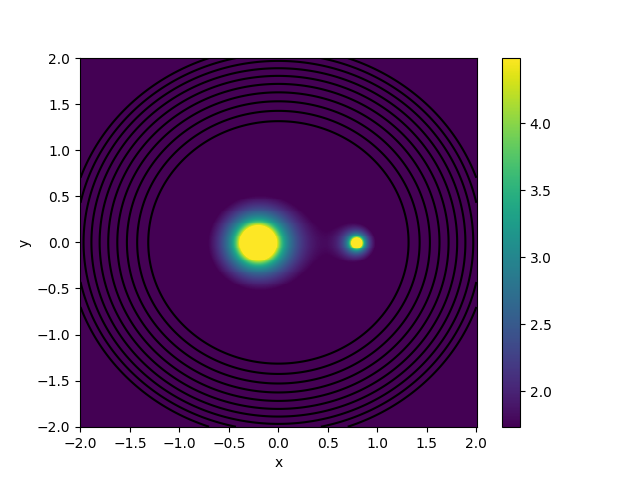

In [9]:
plt.figure()
plt.pcolor(x_grid, y_grid, U_grav)
plt.colorbar()
plt.clim((U_min,U_max))
levels = np.linspace(U_min, U_max, 10)
plt.contour(x_grid, y_grid, U_rot, levels = levels, colors='k')
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'y')

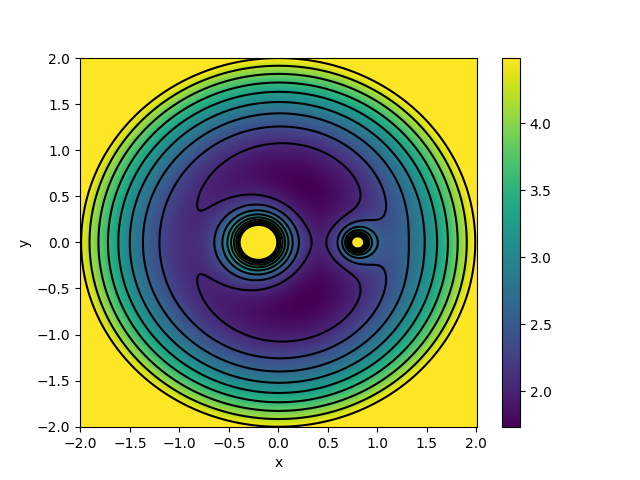

In [10]:
U_pseudo     = U_rot + U_grav

plt.figure()
plt.pcolor(x_grid, y_grid, U_pseudo)
plt.colorbar()
plt.clim((U_min,U_max))
levels = np.linspace(U_min, U_max, 10)
plt.contour(x_grid, y_grid, U, levels = levels, colors='k')
plt.xlabel("x")
plt.ylabel("y")

#### Compute potential gradient

Text(0, 0.5, 'y')

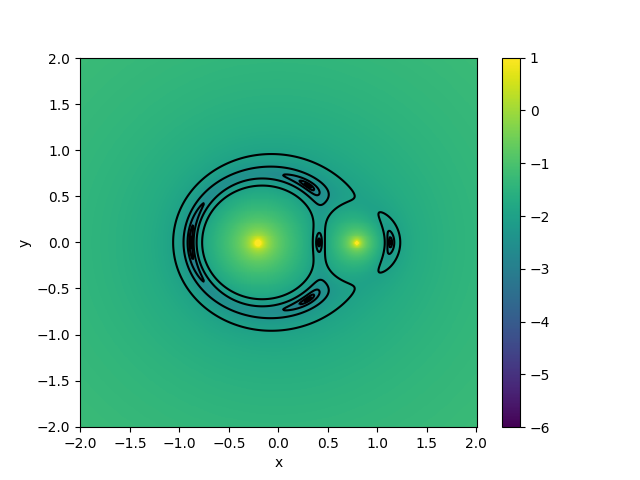

In [11]:
U_x, U_y = np.gradient(U_pseudo)
grad_U   = np.sqrt(U_x * U_x + U_y * U_y) 
U_x_norm = U_x / grad_U
U_y_norm = U_y / grad_U

plt.figure()
plt.pcolor(x_grid, y_grid, np.log10(grad_U))
plt.clim((-6,1))
plt.colorbar()
plt.contour(x_grid, y_grid, grad_U, levels = np.logspace(-5,-2,10), colors='k')
# plt.quiver(x_grid[0::5,0::5], y_grid[0::5,0::5], U_x_norm[0::5,0::5], U_y_norm[0::5,0::5], color='r',scale = 50) 
plt.xlabel("x")
plt.ylabel("y")

(-4.490862545172521, -1.7299021837025543)

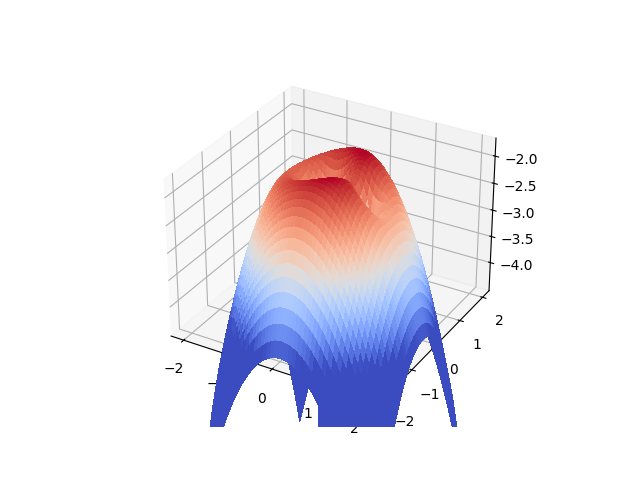

In [12]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf    = ax.plot_surface(x_grid, y_grid, - U, cmap=cm.coolwarm, linewidth=0, antialiased=False, vmin = -U_max, vmax = -U_min)
ax.set_zlim((-U_max, -U_min))

In [95]:
#### Equations of motion for CRP3BP

In [13]:
# function that returns dy/dt
def crp3bp_ode(y,t):
    r_vec = y[:2]
    v_vec = y[2:]

    # Create the derivative vector and copy the velocities into it
    y_dot = np.zeros_like(y)
    y_dot[:2] = y[2:]

    # Calculate the accelerations
    x  = r_vec[0]
    y  = r_vec[1]
    vx = v_vec[0]
    vy = v_vec[1]

    r1 = np.sqrt((x + mu2) ** 2 + y*y)
    r2 = np.sqrt((x - mu1) ** 2 + y*y)
    
    y_dot[2] =  2 * n * vy + n * n * x - (mu1 * (x + mu2)/(r1 ** 3) + mu2 * (x - mu1)/(r2 ** 3))
    y_dot[3] = -2 * n * vx + n * n * y - (mu1 / (r1 ** 3) + mu2 / (r2 ** 3)) * y
    
    return y_dot

Text(0, 0.5, 'y')

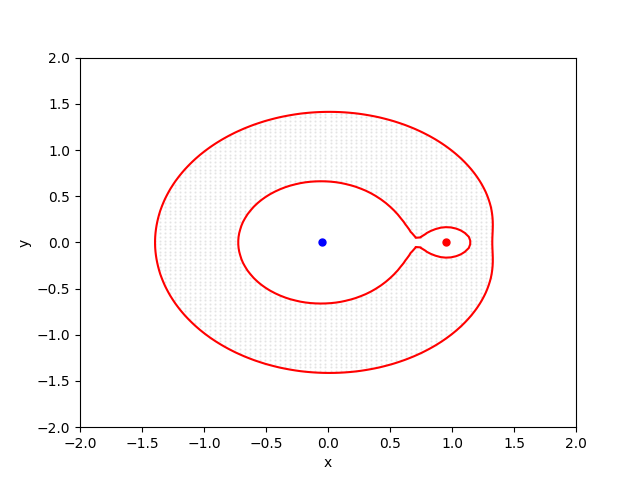

In [90]:
CJ_try = 3.4

plt.figure()
plt.plot(-mu2,0,'.b',markersize=10)
plt.plot(+mu1,0,'.r',markersize=10)
plot_zero_velocity_curve(CJ_try)
# CJ_grid = np.linspace(2, 4, 100)
# for i in range(len(CJ_grid)):
#     plot_zero_velocity_curve(CJ_grid[i])
plt.xlabel("x")
plt.ylabel("y")

#### Create initial conditions and integration time 

In [91]:
#### starting from the X-axis ####
mass_ratio = 20
mu1 = mass_ratio / (1 + mass_ratio)
mu2 = 1 / (mass_ratio + 1)

C_J0 = 3.4
x0   = 0.3
y0   = 0.0
vx0  = 0.0
vy0  = np.sqrt( n ** 2 * (x0 ** 2) + 2 * (mu1 / np.abs((x0 + mu2)) + mu2 / np.abs(x0 - mu1)) - C_J0 )

state_initial = np.array([x0, y0, vx0, vy0])

#### starting from the L4, L5 lagrange point ####
# mass_ratio = 100
# mass_ratio = 20
# mu1 = mass_ratio / (1 + mass_ratio)
# mu2 = 1 / (mass_ratio + 1)

# x0   = 0.5 - mu2
# y0   = +np.sqrt(3) * 0.5
# vx0  = 0.0
# vy0  = 0.01

# t0   = 0.0
# t1   = 100.0
# dt   = 0.001
# t    = np.arange(t0, t1, dt)

# state_initial = np.array([x0, y0, vx0, vy0])

#### Integrate using ODEINT function from the scipy numerical package

In [92]:
# absolute tolerance
atol = 1e-6

# relative tolerance
rtol = 1e-6

# solve ODE
state = odeint(crp3bp_ode, state_initial, t, rtol = rtol, atol = atol)

# extract position and velocity
x  = state[:,0]
y  = state[:,1]
vx = state[:,2]
vy = state[:,3]

In [104]:
# plt.figure()
# plt.plot(t, x)

#### Plot the trajectory

(-2.0, 2.0)

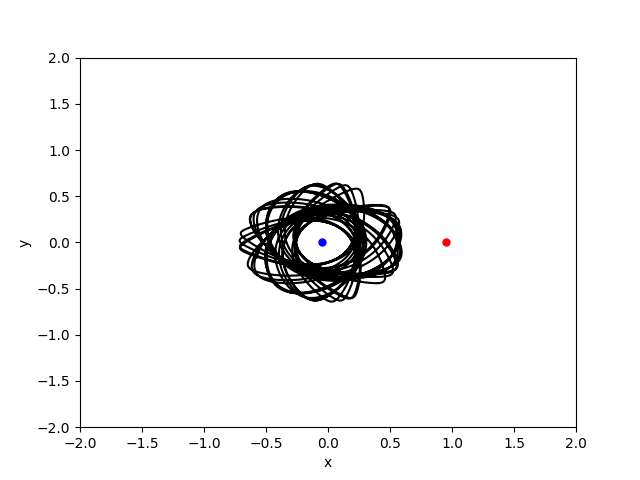

In [93]:
plt.figure()
plt.plot(-mu2,0,'.b',markersize=10) # mass 1 
plt.plot(+mu1,0,'.r',markersize=10) # mass 2
plt.plot(x,y,'-k')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((-2,2))
plt.ylim((-2,2))

#### Compute the value of the Jacobi integral

In [94]:
CJ = Jacobi_integral(x, y, 0, vx, vy, 0, mu1, mu2, n)

In [58]:
#### Plot the values of the Jacobi integral

Text(0, 0.5, 'Jacobi integral, $C_J$')

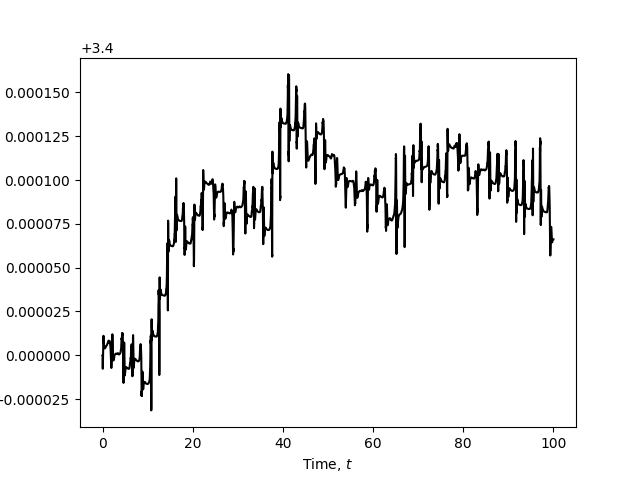

In [95]:
plt.figure()
plt.plot(t, CJ ,'-k')
plt.xlabel(r"Time, $t$")
plt.ylabel(r"Jacobi integral, $C_J$")

Text(0, 0.5, 'Jacobi integral relative change')

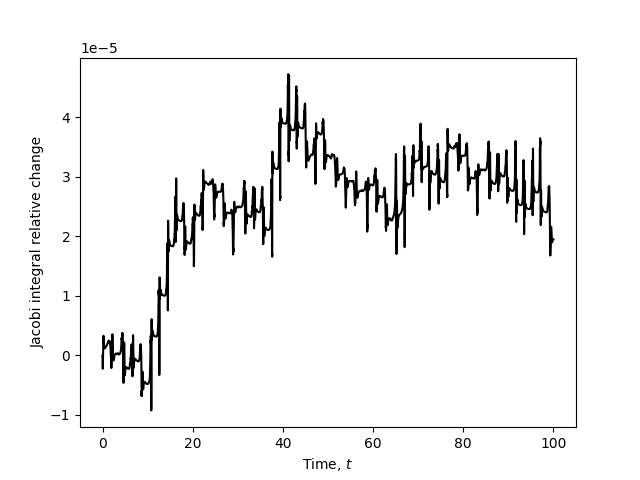

In [96]:
plt.figure()
plt.plot(t,(CJ - CJ[0]) / CJ[0],'-k')
plt.xlabel(r"Time, $t$")
plt.ylabel(r"Jacobi integral relative change")

In [61]:
#### Plot zero-velocity curve on top of the trajectory

(-2.0, 2.0)

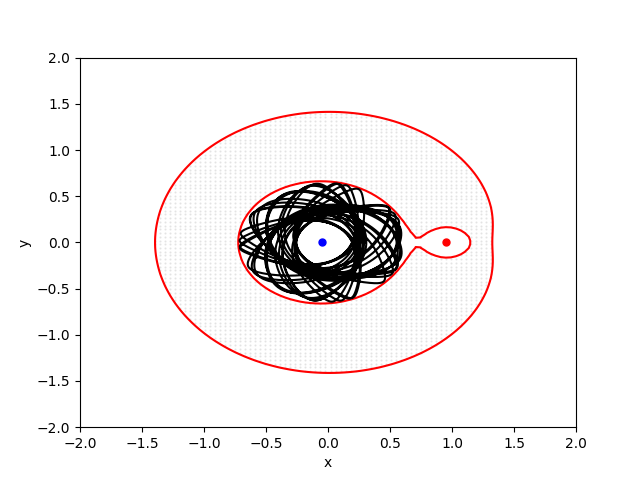

In [97]:
plt.figure()
plt.plot(-mu2,0,'.b',markersize=10)
plt.plot(+mu1,0,'.r',markersize=10)
plot_zero_velocity_curve(CJ[0])
plt.plot(x,y,'-k')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((-2,2))
plt.ylim((-2,2))

#### Plot in inertial frame

(-2.0, 2.0)

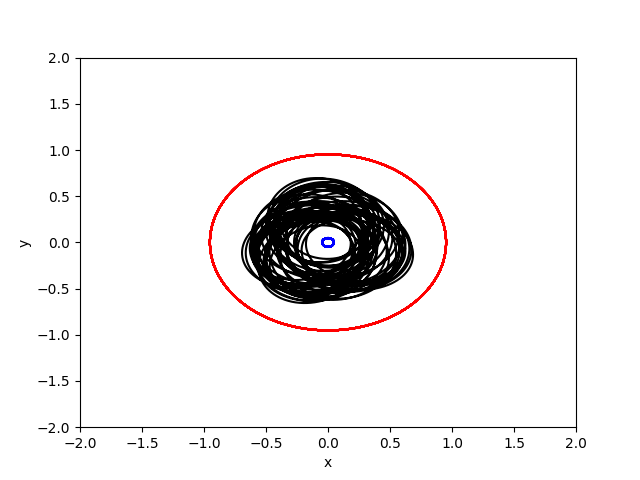

In [98]:
x_inertial, y_inertial   = rotating2inertial(x, y, n, t)
x1_inertial, y1_inertial = rotating2inertial(-mu2, 0, n, t)
x2_inertial, y2_inertial = rotating2inertial(+mu1, 0, n, t)

plt.figure()
# plt.plot(-mu2,0,'.b',markersize=10)
# plt.plot(+mu1,0,'.r',markersize=10)
# plot_zero_velocity_curve(CJ[0])
plt.plot(x1_inertial,y1_inertial,'-b')
plt.plot(x2_inertial,y2_inertial,'-r')
plt.plot(x_inertial,y_inertial,'-k')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((-2,2))
plt.ylim((-2,2))

(-2.0, 2.0)

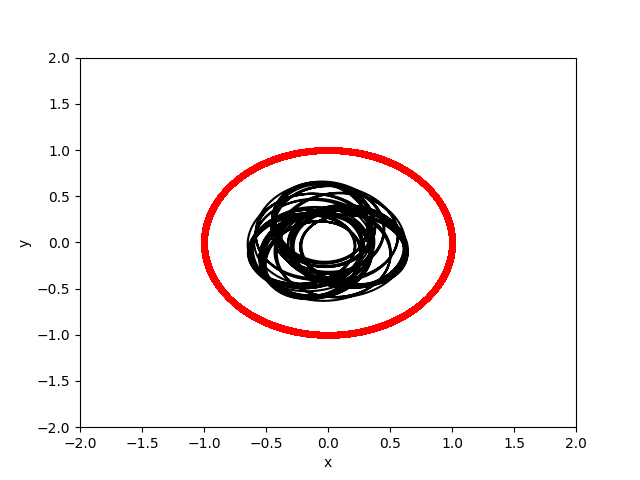

In [99]:
plt.figure()
# plt.plot(-mu2,0,'.b',markersize=10)
# plt.plot(+mu1,0,'.r',markersize=10)
plt.plot(x2_inertial - x1_inertial, y2_inertial - y1_inertial,'.r')
plt.plot(x_inertial - x1_inertial,y_inertial - y1_inertial,'-k')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((-2,2))
plt.ylim((-2,2))

In [390]:
def make_plot(i):

    trail_secs = 20                    # length of the trail in units of time
    max_trail  = int(trail_secs / dt)  # length of the trail in time steps
    r          = 0.1 # radius of circle
    
    c1 = Circle((x1_inertial[i], y1_inertial[i]), r, fc='b', ec='r', zorder=10)
    c2 = Circle((x2_inertial[i], y2_inertial[i]), r, fc='r', ec='g', zorder=10)
    c3 = Circle((x_inertial[i], y_inertial[i]), r, fc='k', ec='b', zorder=10)

    ax.add_patch(c1)
    ax.add_patch(c2)
    ax.add_patch(c3)

    # The trail will be divided into ns segments and plotted as a fading line.
    ns = 50
    s  = max_trail // ns

    for j in range(ns):
        imin = i - (ns-j)*s
        if imin < 0:
            continue
        imax = imin + s + 1
        
        # The fading looks better if we square the fractional length along the
        # trail.
        
        alpha = (j/ns)**2
        
        ax.plot(x1_inertial[imin:imax], y1_inertial[imin:imax], c='b', solid_capstyle='butt',
                lw=2, alpha=alpha)
        
        ax.plot(x2_inertial[imin:imax], y2_inertial[imin:imax], c='r', solid_capstyle='butt',
                lw=2, alpha=alpha)

        ax.plot(x_inertial[imin:imax], y_inertial[imin:imax], c='k', solid_capstyle='butt',
                lw=2, alpha=alpha)

    # Centre the image on the fixed anchor point, and ensure the axes are equal
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_aspect('equal', adjustable='box')
    plt.axis('off')
    plt.savefig('frames_cr3bp/img{:04d}.png'.format(i//di), dpi=72)
    plt.cla()

KeyboardInterrupt: 

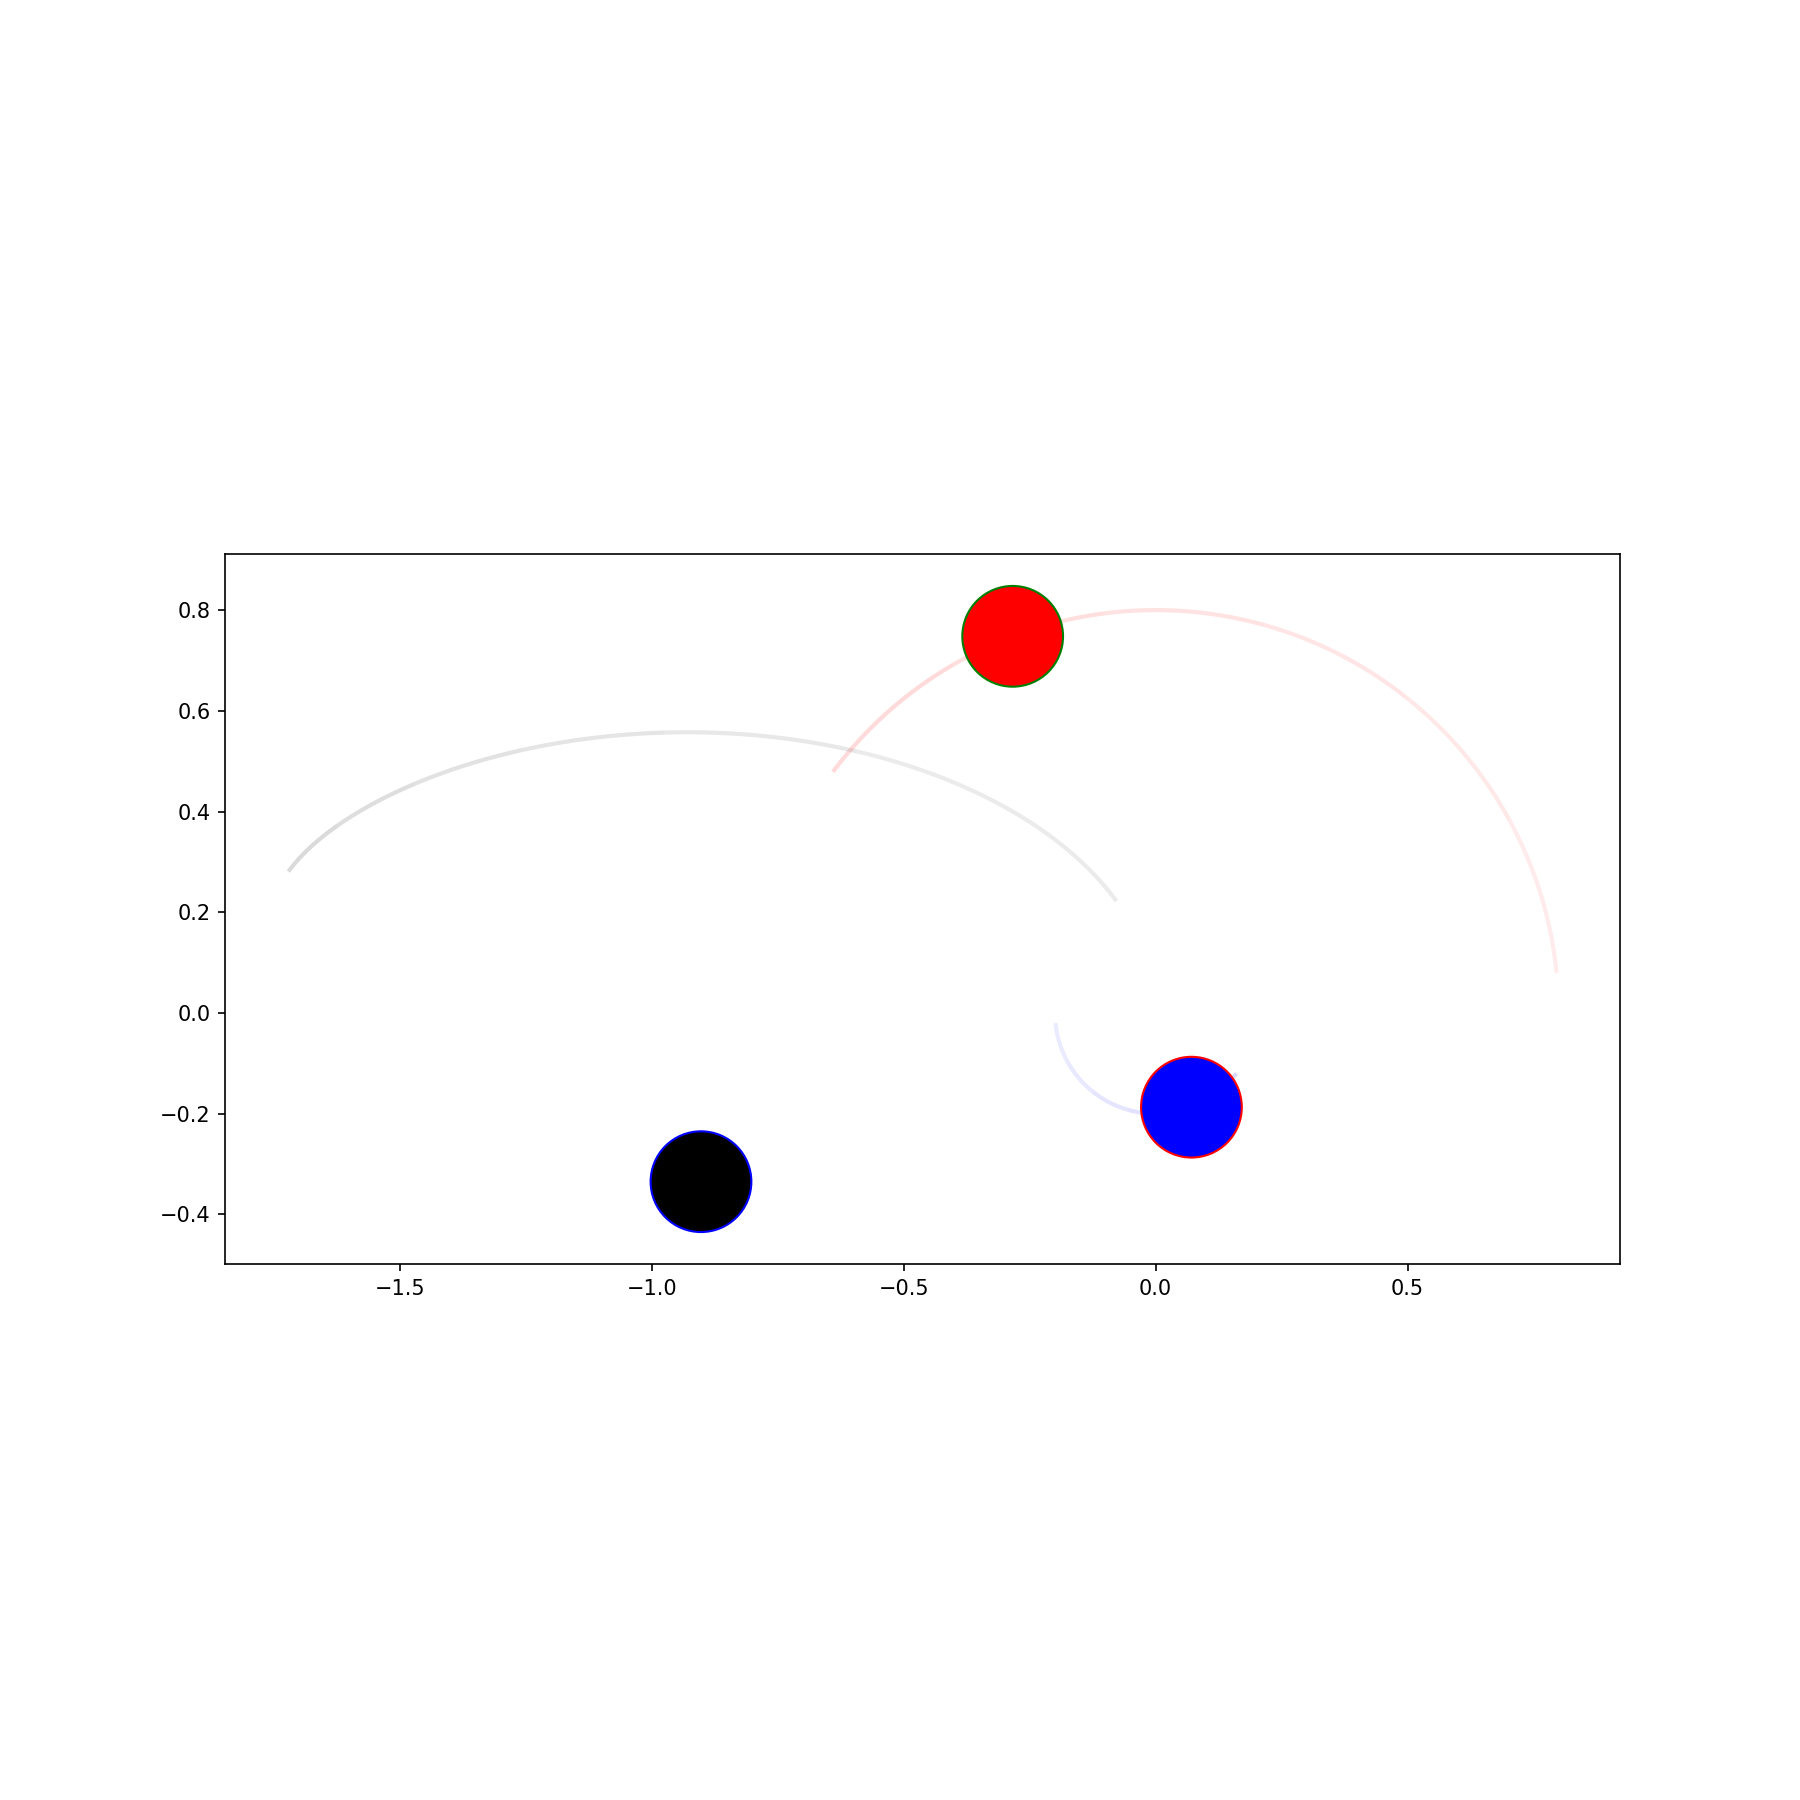

In [391]:
# Make an image every di time points, corresponding to a frame rate of fps
# frames per second.
# Frame rate, s-1

fps = 20
di  = int(1/fps/dt)
fig = plt.figure(figsize=(12, 12), dpi=150)
ax  = fig.add_subplot(111)

for i in range(0, t.size, di):
    make_plot(i)